# Исследование надежности заемщиков


### Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Описание данных

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита


## Откроем таблицу и изучим общую информацию о данных

In [1]:
# считаем данные из csv-файла в датафрейм и сохраним в переменную `data`
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://...data.csv')

In [2]:
# выведим первые 20 строк датафрейма на экран
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
# выведим основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [4]:
# выведим количество пропущенных значений для каждого столбца
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

### Обработка пропусков в столбце `total_income`

In [5]:
# заполним пропуски в столбце `total_income` медианным значением по каждому типу из столбца `income_type`
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

#### Обработка аномальных значений

In [6]:
# заменим отрицательное количество дней трудового стажа в столбце `days_employed`
data['days_employed'] = data['days_employed'].abs()

In [7]:
# посмотрим на медианное значение трудового стажа `days_employed` в днях
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть, т. к. эти данные нам не пригодятся для решения нашей задачи.

In [8]:
# выведим перечень уникальных значений столбца `children`
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [9]:
# удалим строки, в которых встречаются отрицательные значения в столбце `children`
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [10]:
# проверим результат 
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Обработка пропусков в столбце `days_employed`

In [11]:
# заполним пропуски в столбце `days_employed` медианным значением по `income_type`
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [12]:
# проверим результат удаления пропусков
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [13]:
# заменим вещественный тип данных в столбце `total_income` на целочисленный
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [14]:
# обработаем неявные дубликаты в столбцах `education` и `family_status`
# приведём их к нижнему регистру

data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()

# и посмотрим на количество строк-дубликатов в данных
data.duplicated().sum()

71

In [15]:
# удалим их
data = data.drop_duplicates()

### Категоризация данных

In [16]:
# создадим функцию для разбития уровня дотсатка по категориям
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

# применим функцию к датафрейму для удобства дальнейшего анализа
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [17]:
# посмотрим на уникальные цели взятия кредита
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [18]:
# создадим функцию для разнесения цели кредита по категориям
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

# и применим её
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуем данные 

### Рассмотрим зависимость между количеством детей и возвратом кредита 

In [19]:
# посчитаем число клиентов с просрочками по кредитам и без
data['debt'].value_counts()

0    19599
1     1732
Name: debt, dtype: int64

In [20]:
# узнаем, какой процент должники составляют от числа всех заемщиков
(data[data['debt'] == 1]['debt'].count() / data['debt'].count()) * 100

8.119638085415593

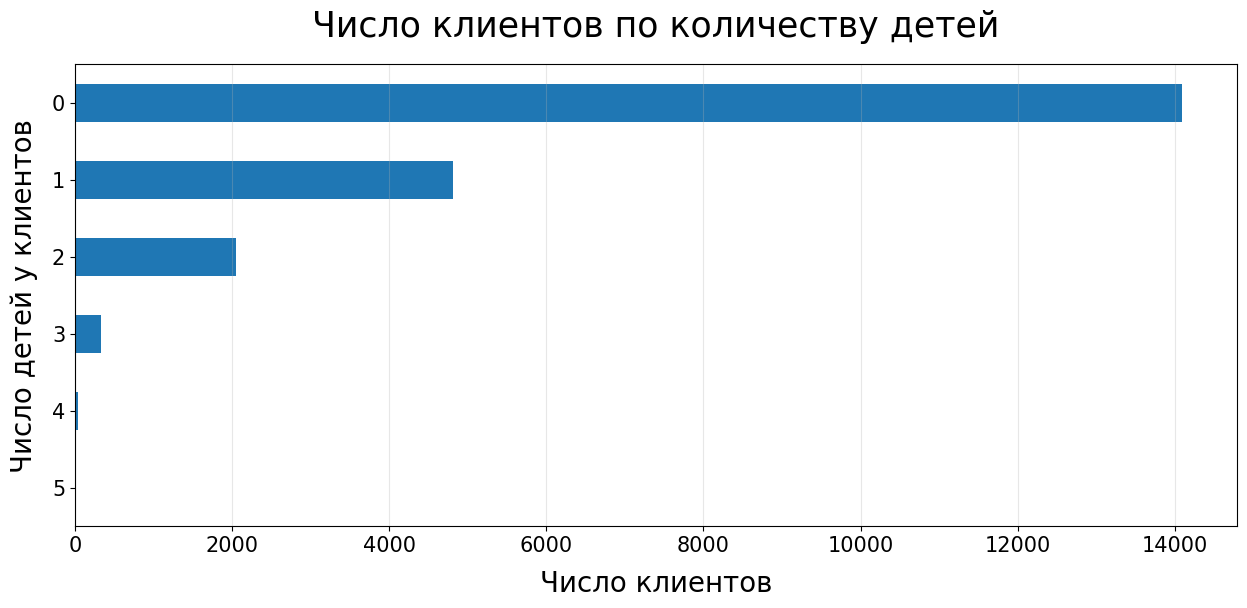

In [21]:
# посмотрим на общее распределение клиентов по кол-ву детей
plt.figure(figsize=(15, 6))
data['children'].value_counts().sort_values(ascending=True).plot.barh()

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Число клиентов', labelpad=10, fontsize=20)
plt.ylabel('Число детей у клиентов', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Число клиентов по количеству детей', pad=20, fontsize=25);

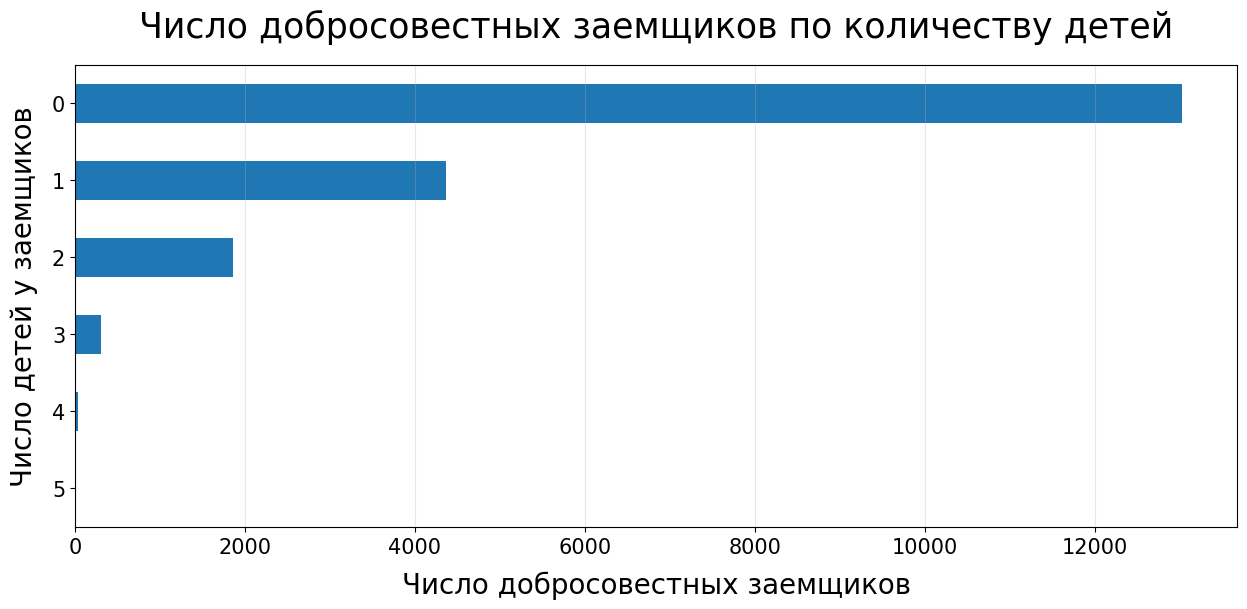

In [22]:
# создадим отдельную таблицу по клиентам с детьми, которые не имеют долгов по кредиту
children_debt_0 = data[['children', 'debt']]
children_debt_0 = children_debt_0[children_debt_0['debt'] == 0]
children_debt_0_gb = children_debt_0.groupby('children')['debt'].count().sort_values(ascending=True)

# построим график и взглянем на распределение числа плательщиков без долгов в зависимости от кол-ва детей
plt.figure(figsize=(15, 6))
children_debt_0_gb.plot.barh(x='debt', y='children')

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Число добросовестных заемщиков', labelpad=10, fontsize=20)
plt.ylabel('Число детей у заемщиков', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Число добросовестных заемщиков по количеству детей', pad=20, fontsize=25);

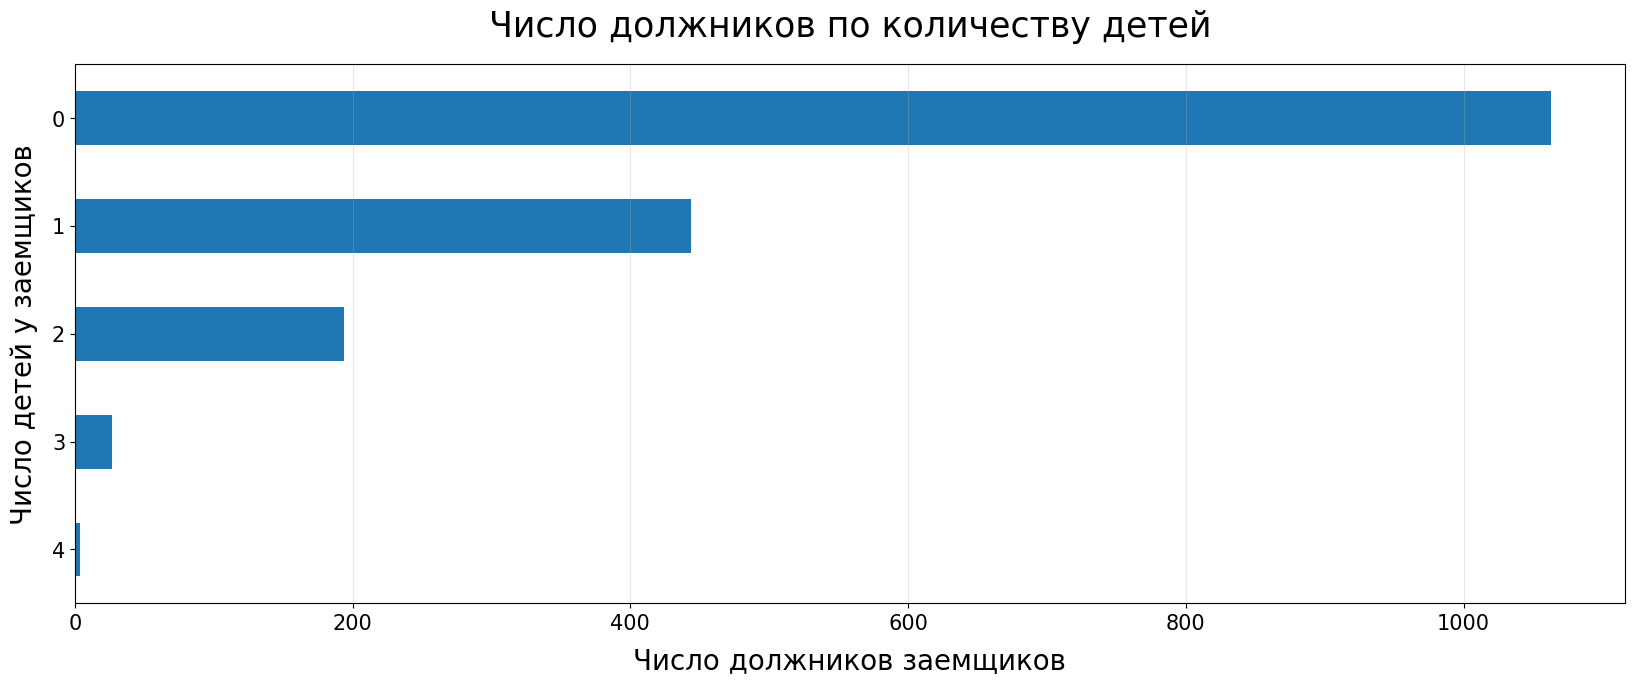

In [23]:
# создадим отдельную таблицу по клиентам с детьми, которые не имеют долгов по кредиту
children_debt_1 = data[['children', 'debt']]
children_debt_1 = children_debt_1[children_debt_1['debt'] == 1]
children_debt_1_gb = children_debt_1.groupby('children')['debt'].count().sort_values(ascending=True)

# построим график и взглянем на распределение числа плательщиков без долгов в зависимости от кол-ва детей
plt.figure(figsize=(20, 7))
children_debt_1_gb.plot.barh(x='debt', y='children')

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Число должников заемщиков', labelpad=10, fontsize=20)
plt.ylabel('Число детей у заемщиков', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Число должников по количеству детей', pad=20, fontsize=25);

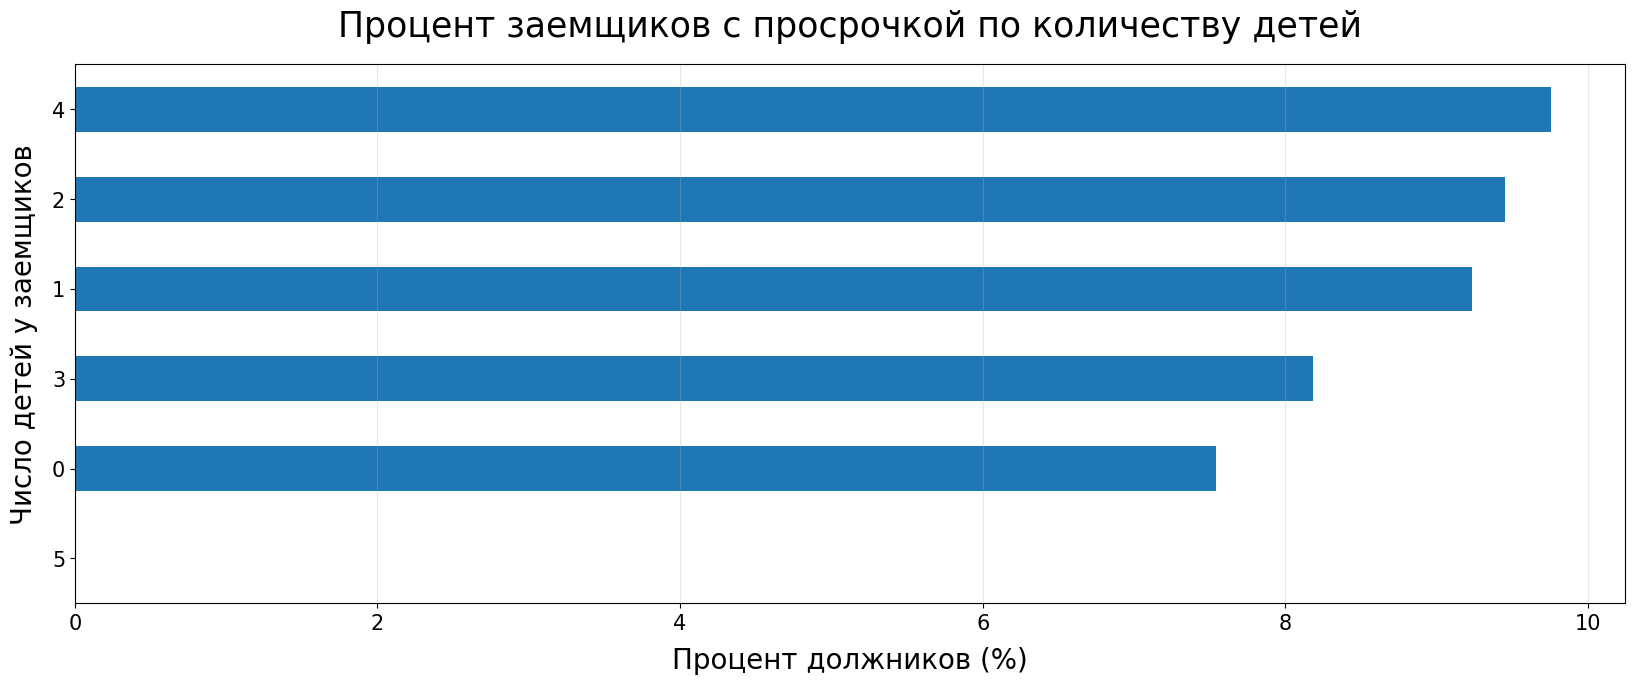

In [24]:
# создаем сводную таблицу и считаем кол-во просрочек по числу детей
data_children_gb = data.groupby('children')['debt'].mean().reset_index()
data_children_gb['debt'] *= 100
data_children_gb = data_children_gb.sort_values(by='debt', ascending=True)

# построим график распределения просрочек по числу детей в прцоентах 
data_children_gb.plot.barh(x='children', y='debt', figsize=(20, 7), legend=False)

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Процент должников (%)', labelpad=10, fontsize=20)
plt.ylabel('Число детей у заемщиков', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Процент заемщиков с просрочкой по количеству детей', pad=20, fontsize=25);

In [25]:
# создаем сводную таблицу и считаем кол-во просрочек по числу детей
data_children_pivot = data.pivot_table(index='children', values='debt', aggfunc=['sum', 'count', 'mean'])
data_children_pivot['mean'] *= 100
data_children_pivot.reset_index().droplevel(1, axis=1)

,children,sum,count,mean
0,0,1063,14091,7.543822
1,1,444,4808,9.234609
2,2,194,2052,9.454191
3,3,27,330,8.181818
4,4,4,41,9.756098
5,5,0,9,0.000000


**Вывод:** 

Процент должников составляет 8.11% от общего числа заемщиков. При анализе зависимости уровня задолженности от количества детей выявлены следующие тенденции:

    Среди клиентов без детей процент должников составляет 7.54%.
    Клиенты с 3 детьми имеют процент должников на уровне 8.18%.
    Процент должников среди клиентов с 1 ребенком составляет 9.23%.
    Для клиентов с 2 детьми этот показатель равен 9.45%.
    Наибольший процент должников наблюдается среди клиентов с 4 детьми и составляет 9.75%.
    Для клиентов с 5 детьми данных недостаточно для определения процента должников.

Таким образом, можно заметить, что наличие детей коррелирует с более высоким процентом должников, причем чем больше детей у клиента, тем выше вероятность задолженности по кредиту.

### Рассмотрим зависимость между семейным положением и возвратом кредита в срок

In [26]:
# посмотрим на общее распределение клиентов по семейному положению
data['family_status'].value_counts()

женат / замужем          12261
гражданский брак          4134
не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64

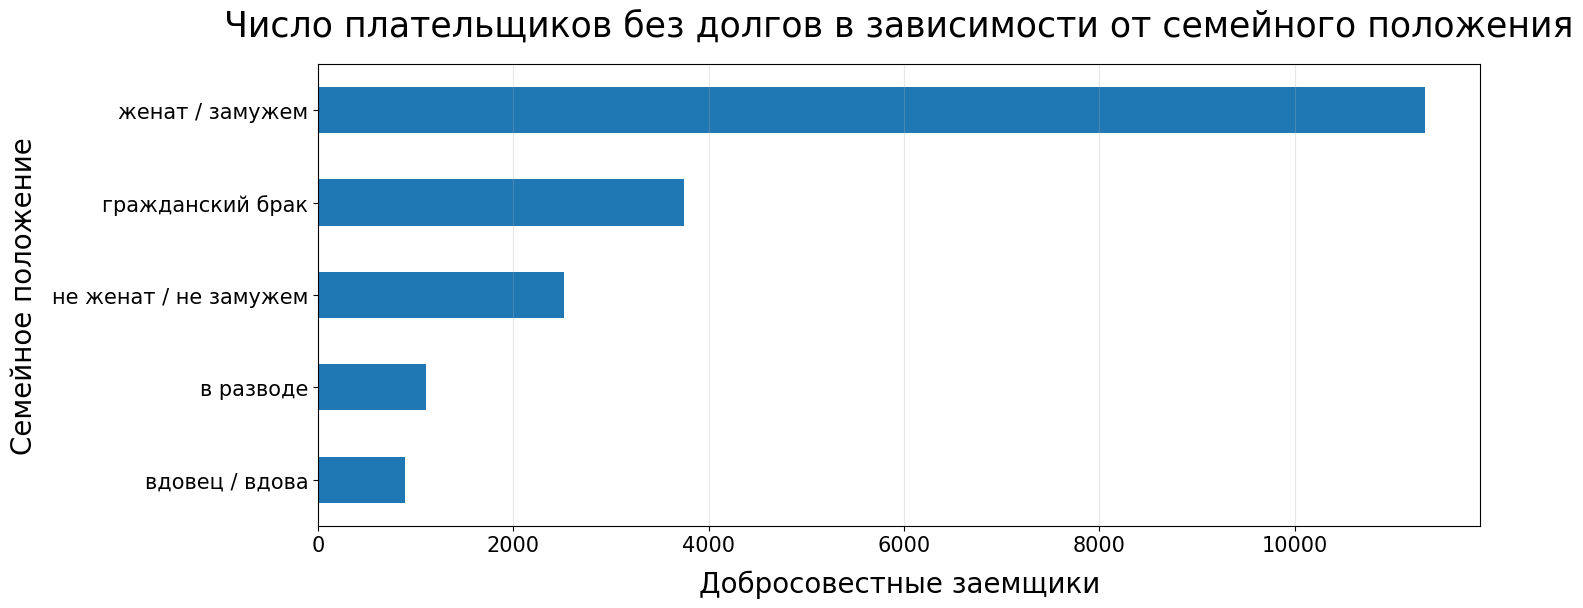

In [27]:
# создадим отдельную таблицу по клиентам разного семейного положения, которые не имеют долгов по кредиту
family_debt_0 = data[['family_status', 'debt']]
family_debt_0 = family_debt_0[family_debt_0['debt'] == 0]
family_debt_0_gb = family_debt_0.groupby('family_status')['debt'].count().sort_values(ascending=True)

# построим график и взглянем на распределение числа плательщиков без долгов в зависимости от семейного положения
plt.figure(figsize=(15, 6))
family_debt_0_gb.plot.barh(x='debt', y='family_status')

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Добросовестные заемщики', labelpad=10, fontsize=20)
plt.ylabel('Семейное положение', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Число плательщиков без долгов в зависимости от семейного положения', pad=20, fontsize=25);

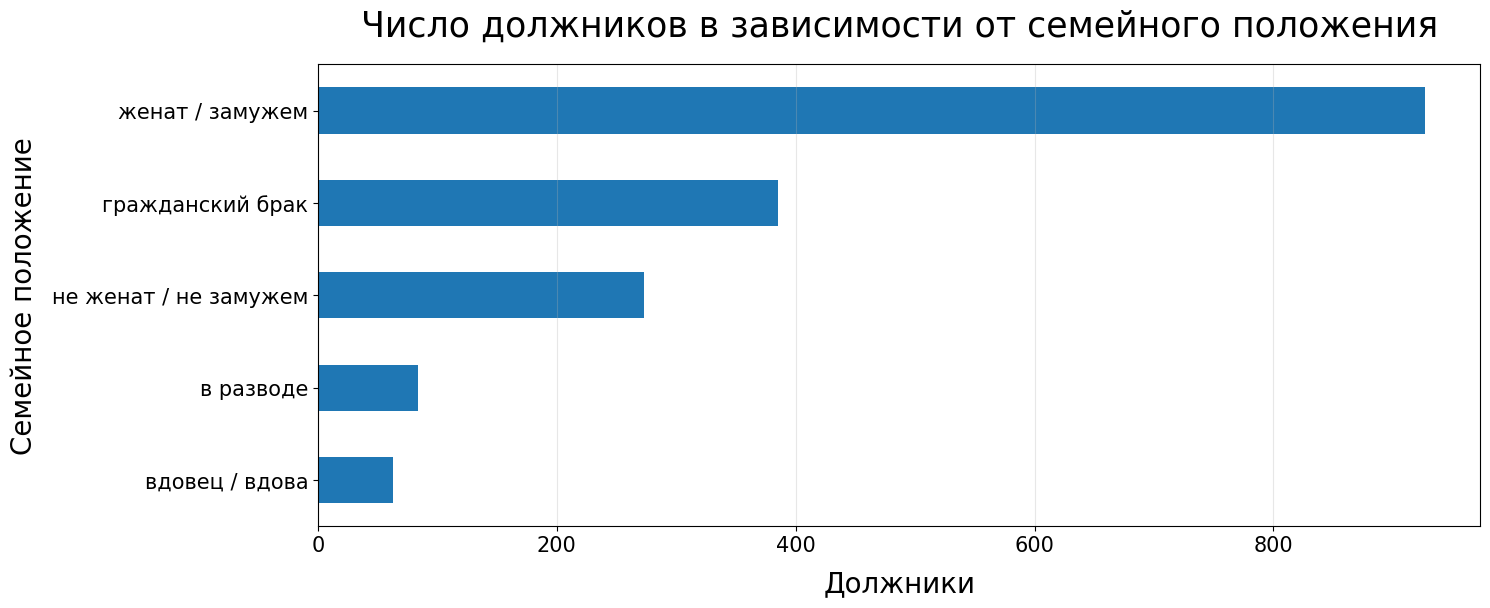

In [28]:
# создадим отдельную таблицу по клиентам разного семейного положения, которые имеют просрочки
family_debt_1 = data[['family_status', 'debt']]
family_debt_1 = family_debt_1[family_debt_1['debt'] == 1]
family_debt_1_gb = family_debt_1.groupby('family_status')['debt'].count().sort_values(ascending=True)

# построим график и взглянем на распределение числа должников в зависимости от семейного положения
plt.figure(figsize=(15, 6))
family_debt_1_gb.plot.barh(x='debt', y='family_status')

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Должники', labelpad=10, fontsize=20)
plt.ylabel('Семейное положение', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Число должников в зависимости от семейного положения', pad=20, fontsize=25);

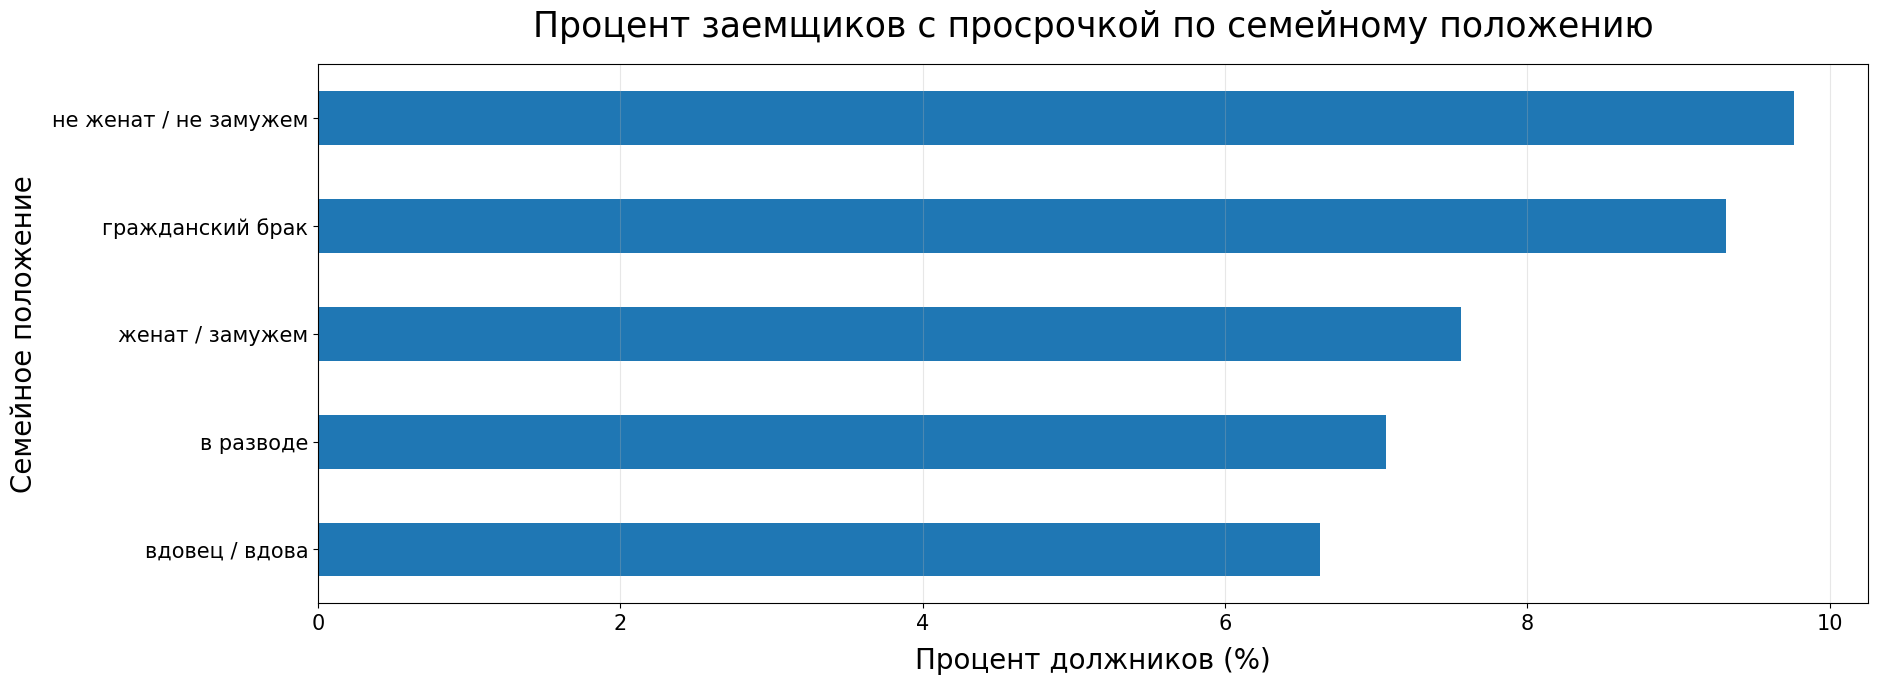

In [29]:
# создаем сводную таблицу и считаем процент ненадежных заемщиков от надежных в зависимости от семейного положения
data_family_gb = data.groupby('family_status')['debt'].mean().reset_index()
data_family_gb['debt'] *= 100
data_family_gb = data_family_gb.sort_values(by='debt', ascending=True)

# построим график распределения просрочек по семейному положению в прцоентах 
data_family_gb.plot.barh(x='family_status', y='debt', figsize=(20, 7), legend=False)

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Процент должников (%)', labelpad=10, fontsize=20)
plt.ylabel('Семейное положение', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Процент заемщиков с просрочкой по семейному положению', pad=20, fontsize=25);

In [30]:
# создаем сводную таблицу и считаем процент ненадежных заемщиков от надежных в зависимости от семейного положения
data_family_pivot = data.pivot_table(index='family_status', values='debt', aggfunc=['sum','count', 'mean'])
data_family_pivot['mean'] *= 100

# выводим на экран 
data_family_pivot.droplevel(1, axis=1).sort_values(by='mean', ascending=False).reset_index()

,family_status,sum,count,mean
0,не женат / не замужем,273,2796,9.763948
1,гражданский брак,385,4134,9.313014
2,женат / замужем,927,12261,7.560558
3,в разводе,84,1189,7.064760
4,вдовец / вдова,63,951,6.624606


**Вывод:** 

Процент должников составляет 8.11% от общего числа заемщиков. При анализе зависимости уровня задолженности от семейного положения выявлены следующие тенденции:

    Наименьший процент должников среди вдовцов/вдов составляет 6.62%.
    Клиенты, находящиеся в разводе, имеют процент должников на уровне 7.06%.
    Среди клиентов, состоящих в браке, процент должников составляет 7.56%.
    В гражданском браке процент должников выше и составляет 9.31%.
    Наибольший процент должников наблюдается среди неженатых/незамужних клиентов и составляет 9.76%.

Таким образом, можно заметить, что семейное положение влияет на вероятность задолженности по кредиту: наименьший процент должников среди вдовцов/вдов и разведенных, в то время как самый высокий процент наблюдается среди клиентов, не состоящих в официальном браке.

### Рассмотрим зависимость между уровнем дохода и возвратом кредита в срок

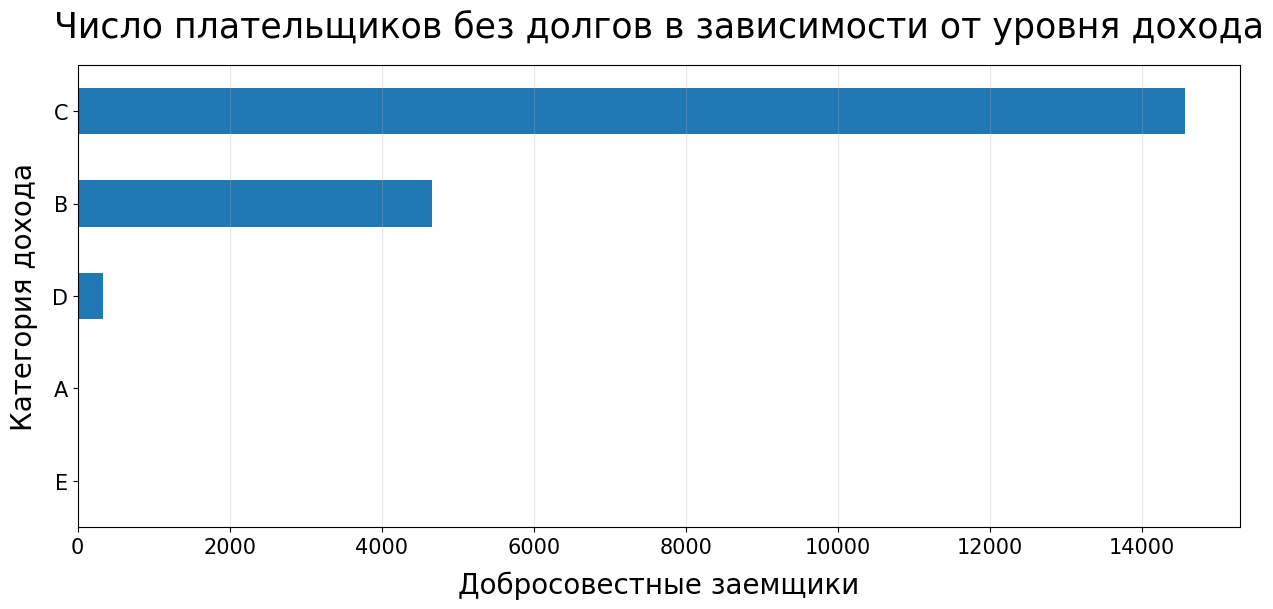

In [31]:
# создадим отдельную таблицу по клиентам с разным уровнем дохода, которые не имеют долгов по кредиту
income_debt_0 = data[['total_income_category', 'debt']]
income_debt_0 = income_debt_0[income_debt_0['debt'] == 0]
income_debt_0_gb = income_debt_0.groupby('total_income_category')['debt'].count().sort_values(ascending=True)

# построим график и взглянем на распределение числа плательщиков без долгов в зависимости от уровня дохода
plt.figure(figsize=(15, 6))
income_debt_0_gb.plot.barh(x='debt', y='total_income_category')

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Добросовестные заемщики', labelpad=10, fontsize=20)
plt.ylabel('Категория дохода', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Число плательщиков без долгов в зависимости от уровня дохода', pad=20, fontsize=25);

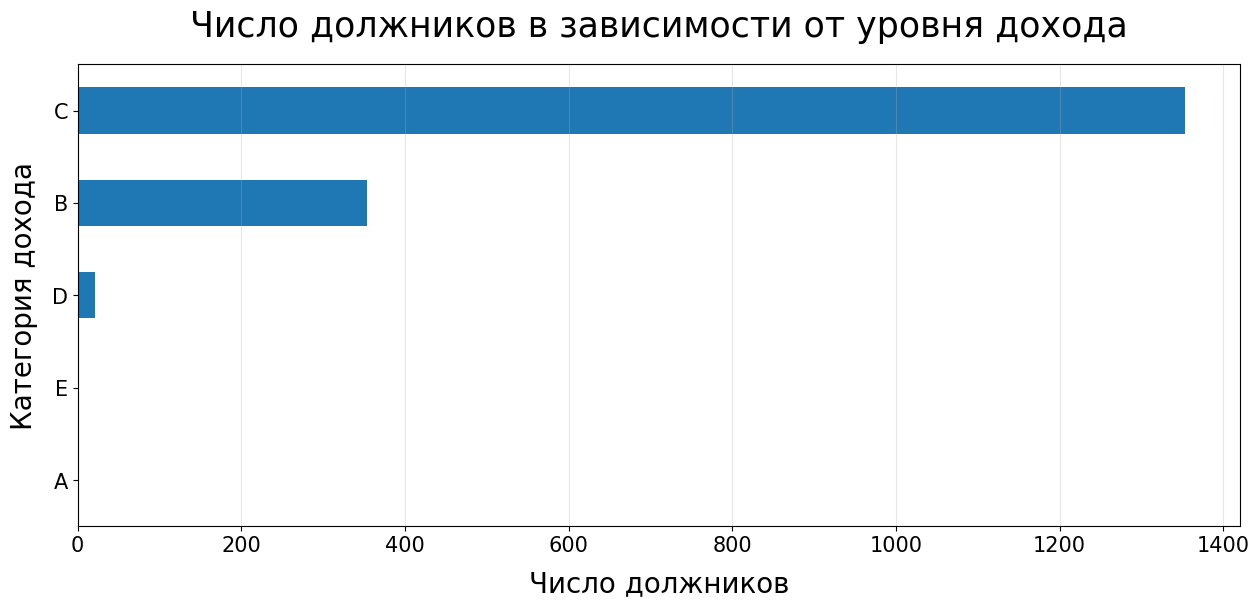

In [32]:
# создадим отдельную таблицу по клиентам с разным уровнем дохода, которые не имеют долгов по кредиту
income_debt_1 = data[['total_income_category', 'debt']]
income_debt_1 = income_debt_1[income_debt_1['debt'] == 1]
income_debt_1_gb = income_debt_1.groupby('total_income_category')['debt'].count().sort_values(ascending=True)

# построим график и взглянем на распределение числа плательщиков без долгов в зависимости от уровня дохода
plt.figure(figsize=(15, 6))
income_debt_1_gb.plot.barh(x='debt', y='total_income_category')

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Число должников', labelpad=10, fontsize=20)
plt.ylabel('Категория дохода', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Число должников в зависимости от уровня дохода', pad=20, fontsize=25);

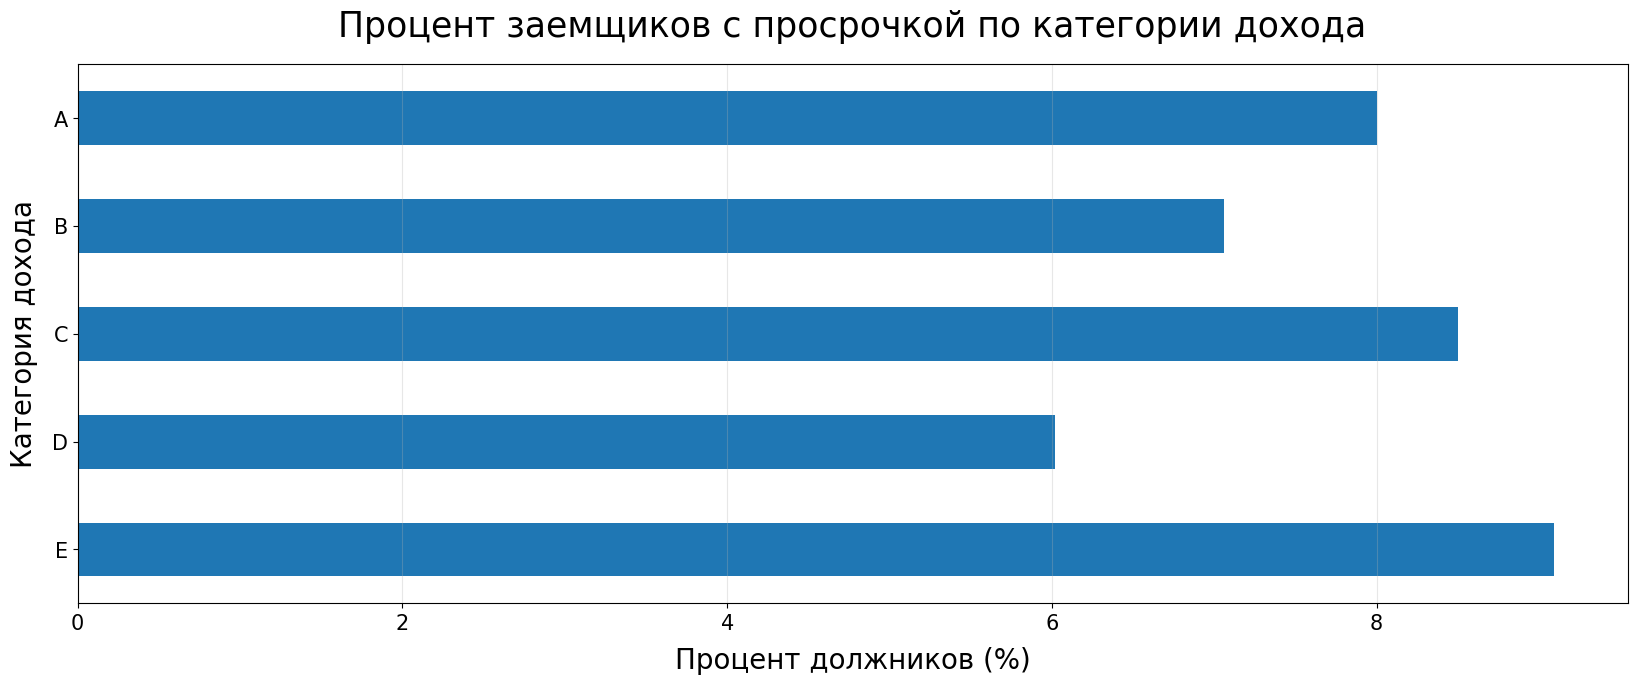

In [33]:
# создаем сводную таблицу и считаем процент просрочек по категории дохода
data_income_debt_gb = data.groupby('total_income_category')['debt'].mean().reset_index()
data_income_debt_gb['debt'] *= 100
data_income_debt_gb = data_income_debt_gb.sort_values(by='total_income_category', ascending=False)

# построим график распределения просрочек по категории дохода в прцоентах 
data_income_debt_gb.plot.barh(x='total_income_category', y='debt', figsize=(20, 7), legend=False)

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Процент должников (%)', labelpad=10, fontsize=20)
plt.ylabel('Категория дохода', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Процент заемщиков с просрочкой по категории дохода', pad=20, fontsize=25);

In [34]:
# сводная таблица
data_income_debt_pivot = data.pivot_table(index='total_income_category', values='debt', aggfunc=['sum', 'count', 'mean'])
data_income_debt_pivot['mean'] *= 100
data_income_debt_pivot.droplevel(1, axis=1).reset_index().sort_values(by='total_income_category')

,total_income_category,sum,count,mean
0,A,2,25,8.000000
1,B,354,5014,7.060231
2,C,1353,15921,8.498210
3,D,21,349,6.017192
4,E,2,22,9.090909


**Вывод:** 

Процент должников составляет 8.11% от общего числа заемщиков. При анализе категорий дохода выявлены следующие тенденции:

    Самый низкий процент должников среди категорий дохода наблюдается в категории D (доход 30,001–50,000) и составляет 6.01%.
    Категория B (доход 200,001–1,000,000) имеет процент должников на уровне 7.06%.
    В категории A (доход свыше 1,000,001) процент должников составляет 8.00%.
    Категория C (доход 50,001–200,000) показывает процент должников 8.49%.
    Самый высокий процент должников зафиксирован в категории E (доход до 30,000) и составляет 9.09%.

Таким образом, видно, что с увеличением дохода процент должников уменьшается, за исключением категории A, где процент должников несколько выше, чем в категориях B и D, но все же ниже, чем в категориях C и E.

### Рассмотрим связь цели кредита и его возврата в срок

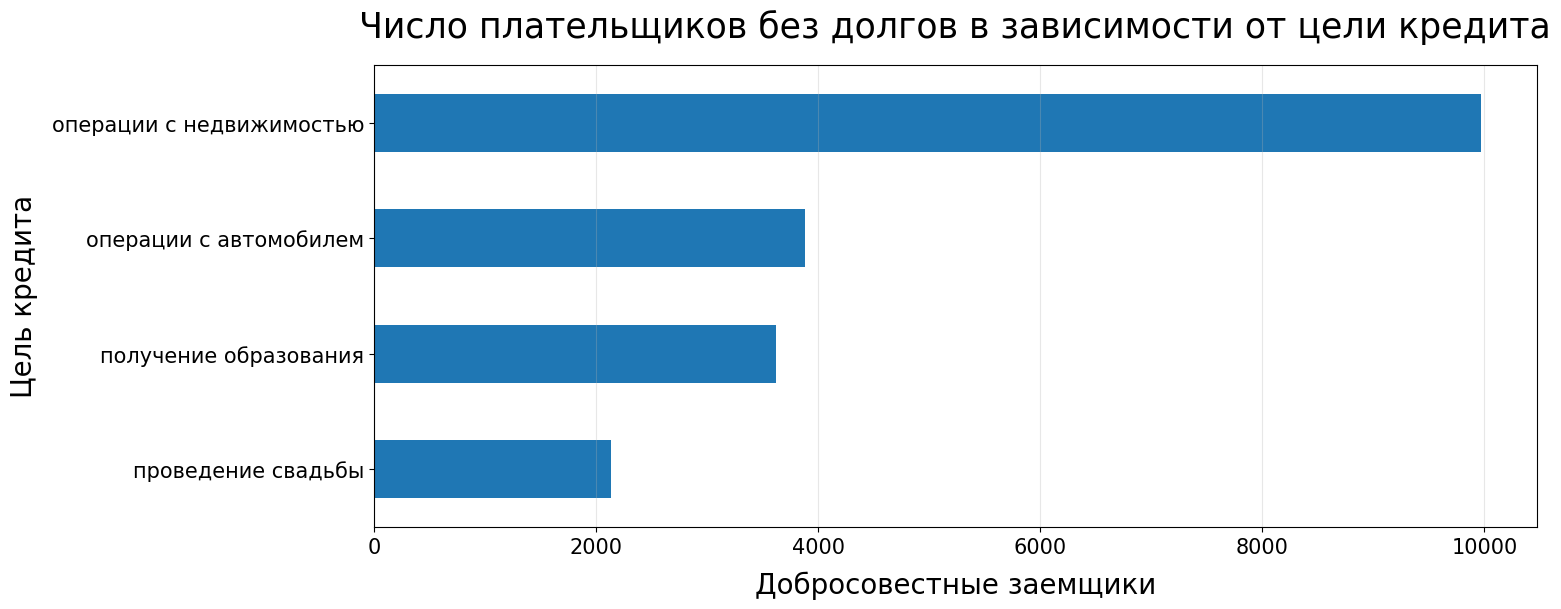

In [35]:
# создадим отдельную таблицу по клиентам с разным целями кредита, которые не имеют долгов по кредиту
purpose_debt_0 = data[['purpose_category', 'debt']]
purpose_debt_0 = purpose_debt_0[purpose_debt_0['debt'] == 0]
purpose_debt_0_gb = purpose_debt_0.groupby('purpose_category')['debt'].count().sort_values(ascending=True)

# построим график и взглянем на распределение числа плательщиков без долгов в зависимости от цели кредита
plt.figure(figsize=(15, 6))
purpose_debt_0_gb.plot.barh(x='debt', y='purpose_category')

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Добросовестные заемщики', labelpad=10, fontsize=20)
plt.ylabel('Цель кредита', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Число плательщиков без долгов в зависимости от цели кредита', pad=20, fontsize=25);

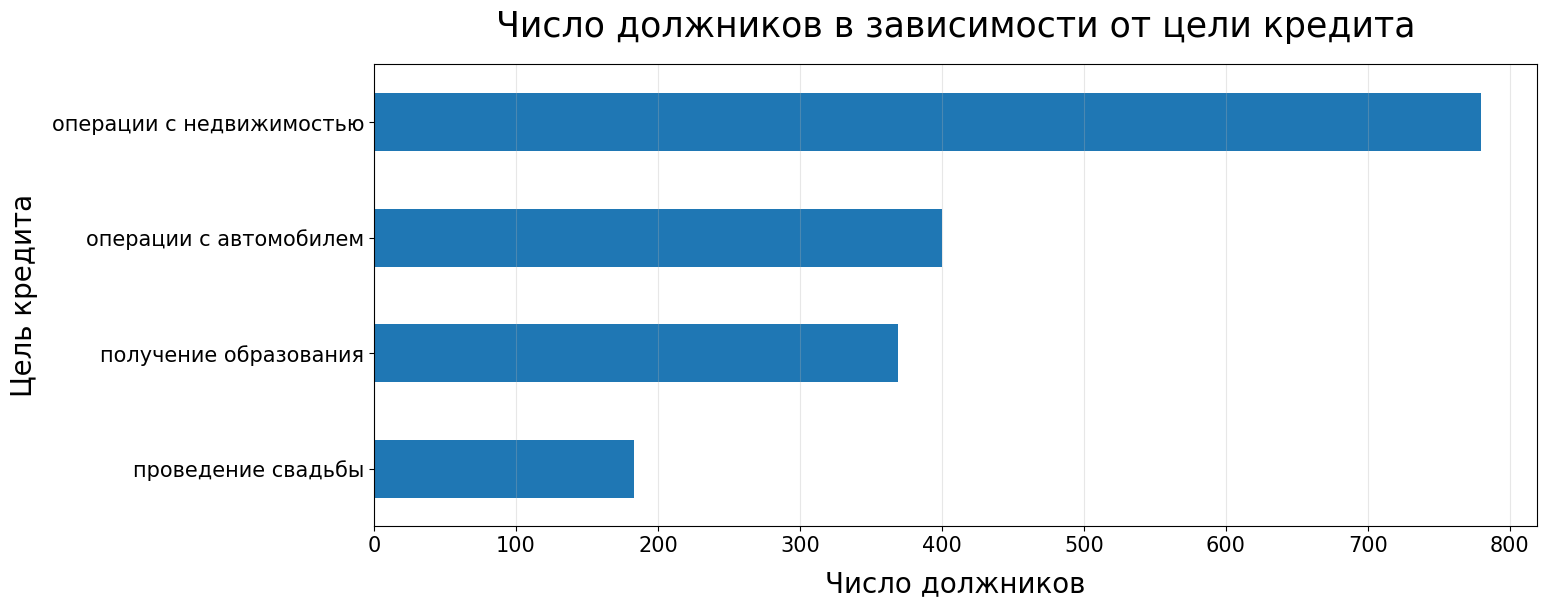

In [36]:
# создадим отдельную таблицу по клиентам с разным целями кредита, которые имеют долги по кредиту
purpose_debt_1 = data[['purpose_category', 'debt']]
purpose_debt_1 = purpose_debt_1[purpose_debt_1['debt'] == 1]
purpose_debt_1_gb = purpose_debt_1.groupby('purpose_category')['debt'].count().sort_values(ascending=True)

# построим график и взглянем на распределение числа плательщиков без долгов в зависимости от цели кредита
plt.figure(figsize=(15, 6))
purpose_debt_1_gb.plot.barh(x='debt', y='purpose_category')

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Число должников', labelpad=10, fontsize=20)
plt.ylabel('Цель кредита', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Число должников в зависимости от цели кредита', pad=20, fontsize=25);

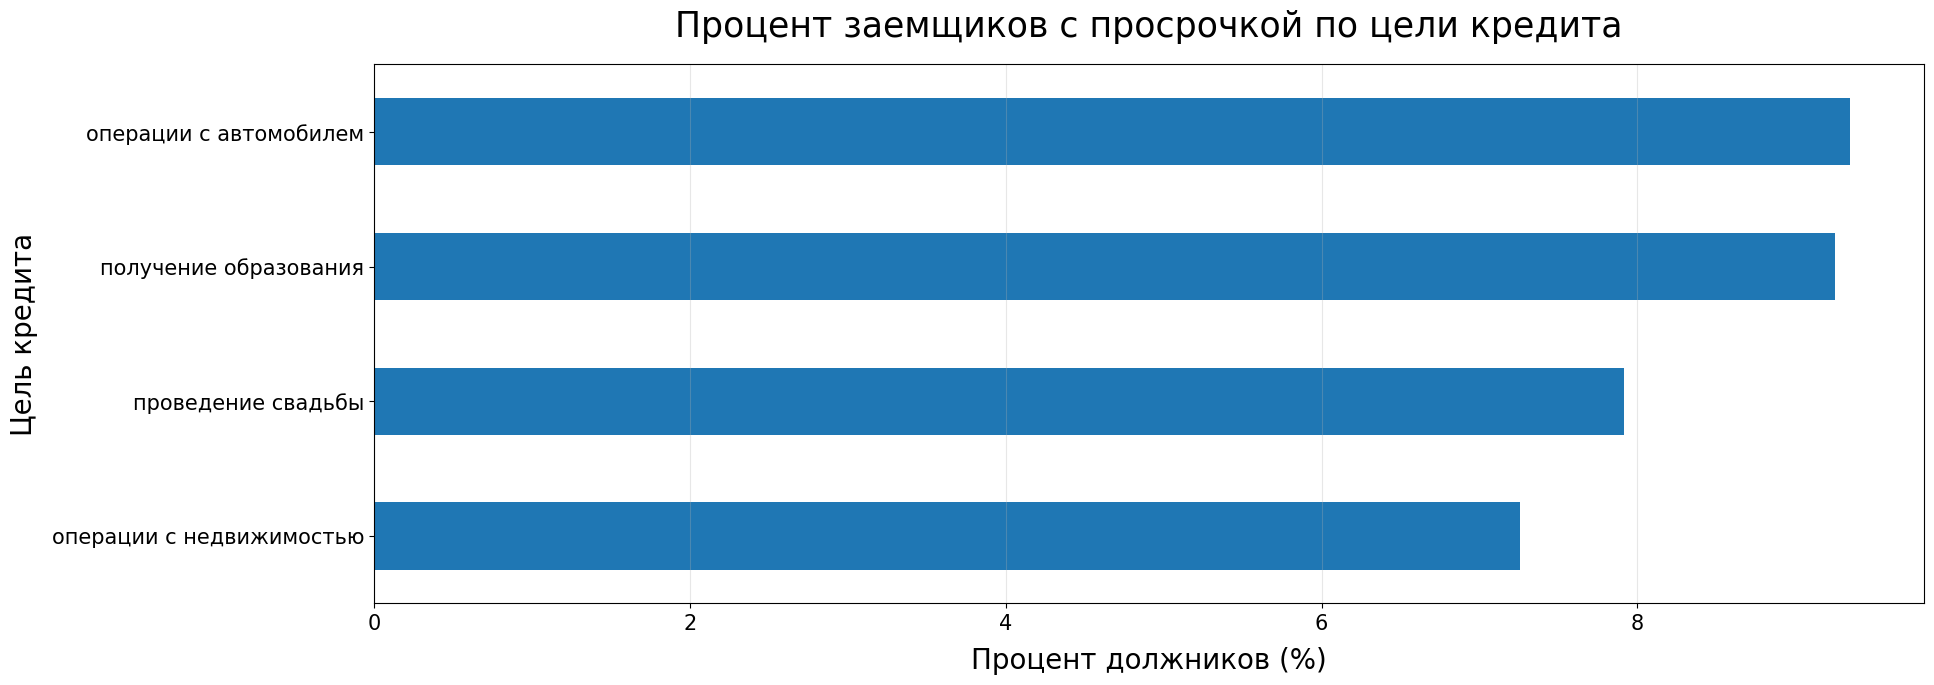

In [37]:
# создаем сводную таблицу и считаем процент просрочек по цели кредита
purpose_category_debt_gb = data.groupby('purpose_category')['debt'].mean().reset_index()
purpose_category_debt_gb['debt'] *= 100
purpose_category_debt_gb = purpose_category_debt_gb.sort_values(by='debt', ascending=True)

# построим график распределения просрочек по цели кредита в прцоентах 
purpose_category_debt_gb.plot.barh(x='purpose_category', y='debt', figsize=(20, 7), legend=False)

plt.grid(axis='x', alpha=0.3)
plt.xlabel('Процент должников (%)', labelpad=10, fontsize=20)
plt.ylabel('Цель кредита', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Процент заемщиков с просрочкой по цели кредита', pad=20, fontsize=25);

In [38]:
# сводная таблица
purpose_category_debt_pivot = data.pivot_table(index='purpose_category', values='debt', aggfunc=['sum', 'count', 'mean'])
purpose_category_debt_pivot['mean'] *= 100
purpose_category_debt_pivot.droplevel(1, axis=1).reset_index().sort_values(by='mean', ascending=False)

,purpose_category,sum,count,mean
0,операции с автомобилем,400,4279,9.347978
2,получение образования,369,3988,9.252758
3,проведение свадьбы,183,2313,7.911803
1,операции с недвижимостью,780,10751,7.255139


**Вывод:** 

Процент должников составляет 8.11% от общего числа заемщиков. При анализе зависимости уровня задолженности от цели кредита выявлены следующие тенденции:

    Наименьший процент должников наблюдается среди клиентов, взявших кредит на операции с недвижимостью, и составляет 7.25%.
    Клиенты, взявшие кредит на проведение свадьбы, имеют процент должников на уровне 7.91%.
    Процент должников среди клиентов, взявших кредит на получение образования, составляет 9.25%.
    Наибольший процент должников наблюдается среди клиентов, взявших кредит на операции с автомобилем, и составляет 9.34%.

Таким образом, можно заметить, что цель кредита влияет на вероятность задолженности: наименьший процент должников среди клиентов с кредитами на недвижимость и свадьбу, в то время как кредиты на образование и автомобили имеют более высокий процент должников.

#### Возможные причины появления пропусков в исходных данных.

1. Технические ошибки: Пропуски могут возникнуть в процессе внесения или вигрузки данных.


2. Человеческий фактор: сотрудник может случайно исказить данные. 


3. Логический пропуск: иногда отсутствие данных может означать отсутствие наличия какого-то признака.

#### Заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Медиана менее чувствительна к выбросам в данных по сравнению со средним значением. 

### Общий вывод.

Анализ данных показал важные закономерности в контексте различных категорий клиентов и их поведения относительно кредитных задолженностей:

1. **Дети**: Наличие детей увеличивает вероятность задолженности. Наименьший процент должников среди клиентов без детей (7.54%), а наибольший — среди клиентов с четырьмя детьми (9.75%).


2. **Семейное положение**: Семейное положение также влияет на вероятность задолженности. Наименьший процент должников наблюдается среди вдовцов/вдов (6.62%) и разведенных (7.06%), а наибольший — среди неженатых/незамужних (9.76%).


3. **Уровень дохода**: Уровень дохода также влияет на вероятность задолженности. Самый низкий процент должников наблюдается среди клиентов с доходом 30,001–50,000 (категория D) — 6.01%, а самый высокий — среди клиентов с доходом до 30,000 (категория E) — 9.09%.


4. **Цель кредита**: Цель кредита имеет значение для уровня задолженности. Наименьший процент должников среди клиентов, взявших кредиты на операции с недвижимостью (7.25%), и наибольший — среди клиентов, взявших кредиты на операции с автомобилями (9.34%).